# **PREDICTING PNEUMONIA USING CHEST XRAY IMAGES**


## **Key facts**

    1. Pneumonia accounts for 15% of all deaths of children under 5 years old, killing 808 694 children in 2017
    2. Pneumonia can be caused by viruses, bacteria, or fungi.
    3. Pneumonia can be prevented by immunization, adequate nutrition, and by addressing environmental factors.
    4. Pneumonia caused by bacteria can be treated with antibiotics, but only one third of children with pneumonia receive the antibiotics they need.

## **Pneumonia - Defined By WHO**

Pneumonia is a form of **acute respiratory infection that affects the lungs**. The lungs are made up of small sacs called alveoli, which fill with air when a healthy person breathes. When an individual has pneumonia, the alveoli are filled with pus and fluid, which makes breathing painful and limits oxygen intake.

Pneumonia is the single largest infectious cause of death in children worldwide. **Pneumonia killed 808 694 children under the age of 5 in 2017**, accounting for 15% of all deaths of children under five years old. Pneumonia affects children and families everywhere, but is **most prevalent in South Asia and sub-Saharan Africa**. Children can be protected from pneumonia, it can be prevented with simple interventions, and treated with low-cost, low-tech medication and care.
Causes

Pneumonia is caused by a number of infectious agents, including viruses, bacteria and fungi. The most common are:

    1. Streptococcus pneumoniae – the most common cause of bacterial pneumonia in children;
    2. Haemophilus influenzae type b (Hib) – the second most common cause of bacterial pneumonia;
    3. respiratory syncytial virus is the most common viral cause of pneumonia;
    4. in infants infected with HIV, Pneumocystis jiroveci is one of the most common causes of pneumonia, responsible for at least one quarter of all pneumonia deaths in HIV-infected infants.

## **Transmission**

Pneumonia can be spread in a number of ways. The viruses and bacteria that are commonly found in a child's nose or throat, can infect the lungs if they are inhaled. They may also spread via air-borne droplets from a cough or sneeze. In addition, pneumonia may spread through blood, especially during and shortly after birth. More research needs to be done on the different pathogens causing pneumonia and the ways they are transmitted, as this is of critical importance for treatment and prevention.

### The below picture visualizes how an xray image can be used to find if a person has pneumonia or not

### ![PNEUMONIA DIAGNOSED IN A PATIENT](https://assets.aboutkidshealth.ca/akhassets/Pneumonia_XRAY_MEDIMG_PHO_EN.png?RenditionID=19)


## Google Colab initialization

In [0]:
from google.colab import files

In [2]:
!pip install pydrive

## Authenticating

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id':'1pUxh3rxNVRtMwI4lH4iJIWUFjgbsrmKP'})
download.GetContentFile('chest-xray-pneumonia.zip')

In [0]:
import zipfile

with zipfile.ZipFile('chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall()

zip_ref.close()

In [0]:
import zipfile

with zipfile.ZipFile('chest_xray.zip', 'r') as zip_ref:
    zip_ref.extractall()

zip_ref.close()

In [8]:
!ls

adc.json    chest-xray-pneumonia.zip  __MACOSX
chest_xray  chest_xray.zip	      sample_data


In [9]:
import os
print("There are {} pneumonia images".format(len(os.listdir("chest_xray/train/PNEUMONIA"))))
print("There are {} normal images".format(len(os.listdir("chest_xray/train/NORMAL"))))

There are 3876 pneumonia images
There are 1342 normal images


In [10]:
os.listdir("chest_xray/train/NORMAL")[0]

'NORMAL2-IM-1138-0001.jpeg'

In [0]:
import cv2
import matplotlib.pyplot as plt

# Viewing Sample images

Pneumonia lungs


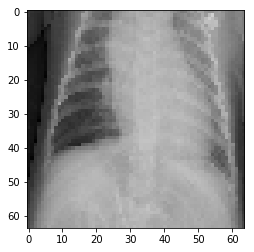

Normal lungs


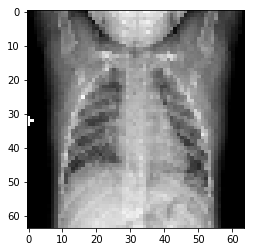

In [12]:
img = cv2.imread('chest_xray/train/PNEUMONIA/person1170_virus_1970.jpeg')
img2 = cv2.imread('chest_xray/train/NORMAL/NORMAL2-IM-1138-0001.jpeg')
img = cv2.resize(img,(64,64))/255
img2 = cv2.resize(img2,(64,64))/255
print("Pneumonia lungs")
plt.imshow(img)
plt.show()
print("Normal lungs")
plt.imshow(img2)
plt.show()

# CREATING THE MODEL

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.optimizers import Adam,SGD
from keras.layers import Input
from keras.models import Model

Using TensorFlow backend.


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
model = Sequential()

In [16]:
ip = Input(shape=(64,64,3))
conv1 = Conv2D(32,kernel_size=(3,3))(ip)
mp1 = MaxPooling2D()(conv1)
d1 = Dropout(0.2)(mp1)
conv2 = Conv2D(64,kernel_size=(3,3))(d1)
mp2 = MaxPooling2D()(conv2)
d2 = Dropout(0.2)(mp2)
conv3 = Conv2D(128,kernel_size=(3,3))(d2)
mp3 = MaxPooling2D()(conv3)
d3 = Dropout(0.2)(mp3)
f = Flatten()(mp3)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
h1 = Dense(128,activation='relu')(f)
h2 = Dense(64,activation='relu')(h1)
h3 = Dropout(0.4)(h2)
h4 = Dense(16,activation='relu')(h3)
op1 = Dense(1,activation='sigmoid')(h4)
model = Model(inputs=ip, outputs=op1)

In [0]:
sgd = SGD(lr=0.01, momentum=0.9, decay=0.000005, nesterov=False)

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
num_classes = 2
epochs = 5
image_width = 64
image_height = 64
batch_size = 64
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   shear_range=0.2,
                                   zoom_range=0.2
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train/',
                                                 target_size=(image_width, image_height),
                                                 batch_size=batch_size,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('chest_xray/test/',
                                            target_size=(image_width, image_height),
                                            batch_size=batch_size,
                                            class_mode='binary')

val_set = test_datagen.flow_from_directory('chest_xray/val',
                                            target_size=(image_width, image_height),
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0   

In [22]:
gen = model.fit_generator(training_set,
                    steps_per_epoch=5216//batch_size,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=624//batch_size
                   )

Epoch 1/5
81/81 [==============================] - 68s 836ms/step - loss: 0.5090 - acc: 0.7568 - val_loss: 0.4208 - val_acc: 0.8212
Epoch 2/5
81/81 [==============================] - 66s 809ms/step - loss: 0.3225 - acc: 0.8578 - val_loss: 0.3318 - val_acc: 0.8518
Epoch 3/5
81/81 [==============================] - 64s 795ms/step - loss: 0.2559 - acc: 0.8893 - val_loss: 0.3203 - val_acc: 0.8625
Epoch 4/5
81/81 [==============================] - 64s 789ms/step - loss: 0.2272 - acc: 0.9072 - val_loss: 0.2348 - val_acc: 0.9054
Epoch 5/5
81/81 [==============================] - 63s 776ms/step - loss: 0.1917 - acc: 0.9240 - val_loss: 0.3018 - val_acc: 0.8714


# ACCURACY

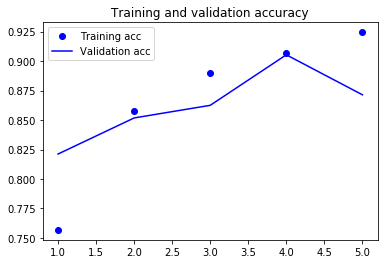

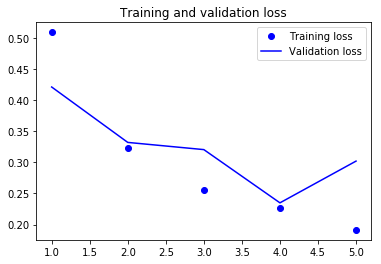

In [23]:
acc = gen.history['acc']
val_acc = gen.history['val_acc']
loss = gen.history['loss']
val_loss = gen.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# UNDERSTANDING INTERMEDIATE LAYERS BY VISUALIZING

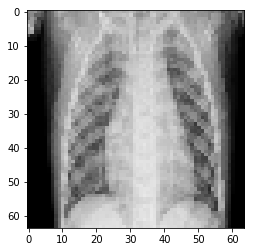

In [24]:
g_img = []
import numpy as np
dir = 'chest_xray/train/PNEUMONIA'
for filename in os.listdir(dir):
    try:
        img = cv2.imread(os.path.join(dir,filename))
        img = cv2.resize(img,(64,64))/255
        # img = np.array(img)
        g_img.append(img)
    except:
        pass
plt.imshow(g_img[0])

In [25]:
g_img = np.array(g_img)
g_img[0].shape

(64, 64, 3)

In [0]:
inputs = model.input
outputs = [layer.output for layer in model.layers][1:]
activations = Model(inputs, outputs)
pred = activations.predict(np.expand_dims(img, axis=0))

In [0]:
names = [ layer.name for layer in model.layers]

The output image for all the conv layers


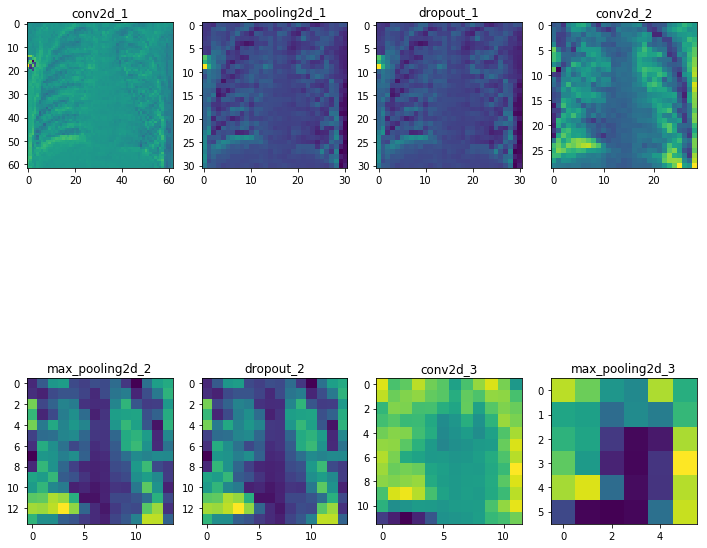

In [28]:
print("The output image for all the conv layers")
fig = plt.figure(figsize=(12,12))
for i in range(8):
    ax = fig.add_subplot(2,4,i+1)
    ax.title.set_text(names[i+1])
    ax.imshow(pred[i][0, :, :, 4])

# PREDICTING SAMPLES

In [29]:
os.listdir('chest_xray/val/NORMAL/')

['NORMAL2-IM-1431-0001.jpeg',
 'NORMAL2-IM-1438-0001.jpeg',
 'NORMAL2-IM-1442-0001.jpeg',
 'NORMAL2-IM-1427-0001.jpeg',
 'NORMAL2-IM-1440-0001.jpeg',
 'NORMAL2-IM-1437-0001.jpeg',
 '.DS_Store',
 'NORMAL2-IM-1436-0001.jpeg',
 'NORMAL2-IM-1430-0001.jpeg']

In [30]:
img = cv2.imread('chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg')
img = cv2.resize(img,(64,64))/255
pred = model.predict(np.expand_dims(img, axis=0))
print("Pneumonia: Expected class - 1 ; Predicted class - {}".format(np.round(pred)))

img = cv2.imread('chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg')
img = cv2.resize(img,(64,64))/255
pred = model.predict(np.expand_dims(img, axis=0))
print("Pneumonia: Expected class - 1 ; Predicted class - {}".format(np.round(pred)))

img = cv2.imread('chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg')
img = cv2.resize(img,(64,64))/255
pred = model.predict(np.expand_dims(img, axis=0))
print("NORMAL: Expected class - 0 ; Predicted class - {}".format(np.round(pred)))

img = cv2.imread('chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg')
img = cv2.resize(img,(64,64))/255
pred = model.predict(np.expand_dims(img, axis=0))
print("NORMAL: Expected class - 0 ; Predicted class - {}".format(np.round(pred)))

img = cv2.imread('chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg')
img = cv2.resize(img,(64,64))/255
pred = model.predict(np.expand_dims(img, axis=0))
print("One of the instances where the model fails => NORMAL: Expected class - 0 ; Predicted class - {}".format(np.round(pred)))

Pneumonia: Expected class - 1 ; Predicted class - [[1.]]
Pneumonia: Expected class - 1 ; Predicted class - [[1.]]
NORMAL: Expected class - 0 ; Predicted class - [[0.]]
NORMAL: Expected class - 0 ; Predicted class - [[0.]]
One of the instances where the model fails => NORMAL: Expected class - 0 ; Predicted class - [[1.]]


### This model can be improved by training the model with more images and intuitively finding the features that are responsible for pneumonia and using them in the cnn.

### Perhaps it could save Behrman in O.Henry's Last Leaf, from Pneumonia :)